In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sqlite3
from scipy import stats
from scipy.stats import *

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
df_student_mat = pd.read_csv('student-mat.csv')
df_student_mat.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [3]:
df_student_por = pd.read_csv('student-por.csv')
df_student_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
df_clean_0 = df_student_por["Dalc"] == 1
df_clean = df_student_por[df_clean_0]
df_clean.describe() 


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.0,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,16.689579,2.512195,2.305987,1.536585,2.011086,0.197339,4.006652,3.104213,3.015521,1.0,1.764967,3.461197,3.195122,11.698448,11.895787,12.299335
std,1.191209,1.126137,1.097243,0.724410,0.820494,0.580109,0.910409,1.037199,1.165134,0.0,0.985547,1.439190,3.869203,2.774883,2.847261,3.102898
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,2.000000,1.0,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.0,1.000000,4.000000,2.000000,12.000000,12.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,1.0,2.000000,5.000000,5.000000,14.000000,14.000000,14.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,22.000000,19.000000,19.000000,19.000000


In [5]:
df_cleaner_0 = df_student_por["Walc"] == 1
df_cleaner = df_student_por[df_cleaner_0]
df_cleanst_0 = df_cleaner["Dalc"] == 1
df_cleanst = df_cleaner[df_cleanst_0]
df_cleanst.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0,241.0,241.000000,241.000000,241.000000,241.000000,241.000000
mean,16.601660,2.535270,2.294606,1.560166,2.120332,0.211618,4.058091,3.107884,2.763485,1.0,1.0,3.369295,2.804979,11.692946,11.954357,12.369295
std,1.271088,1.106703,1.110711,0.745480,0.860015,0.592338,0.906428,1.055136,1.142947,0.0,0.0,1.455067,3.524813,2.832312,2.814026,3.045579
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,2.000000,0.000000,4.000000,3.000000,2.000000,1.0,1.0,2.000000,0.000000,10.000000,10.000000,10.000000
50%,16.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.0,1.0,3.000000,2.000000,12.000000,12.000000,13.000000
75%,18.000000,4.000000,3.000000,2.000000,3.000000,0.000000,5.000000,4.000000,4.000000,1.0,1.0,5.000000,4.000000,14.000000,14.000000,14.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,1.0,1.0,5.000000,18.000000,19.000000,19.000000,19.000000


In [6]:
df_drunk_0 = df_student_por["Dalc"] == 5
df_drunk = df_student_por[df_drunk_0]
df_drunk.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,17.529412,2.411765,2.294118,1.705882,1.705882,0.529412,4.058824,3.705882,4.235294,5.0,4.588235,3.529412,7.058824,9.529412,10.058824,10.235294
std,1.736291,1.175735,1.104802,1.046704,1.046704,1.067570,1.144038,1.311712,1.032558,0.0,1.175735,1.419403,5.606588,2.600905,2.164214,2.948080
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,5.0,1.000000,1.000000,0.000000,5.000000,6.000000,5.000000
25%,17.000000,1.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,5.0,5.000000,3.000000,2.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,4.000000,5.000000,5.0,5.000000,4.000000,8.000000,10.000000,10.000000,10.000000
75%,18.000000,3.000000,3.000000,2.000000,2.000000,0.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,10.000000,11.000000,11.000000,11.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,21.000000,16.000000,16.000000,16.000000


In [34]:
#adding total grade to the df
df_student_por['G_total'] = (df_student_por['G1'] + df_student_por['G2'] + df_student_por['G3']) / 3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_total
26,GP,M,15,U,GT3,T,2,2,other,other,...,2,2,1,2,5,8,11,12,12,11.666667
27,GP,M,15,U,GT3,T,4,2,health,services,...,2,4,2,4,1,0,11,11,11,11.000000
28,GP,M,16,U,LE3,A,3,4,services,other,...,3,3,1,1,5,2,12,12,13,12.333333
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,5,5,5,5,4,12,11,12,11.666667
30,GP,M,15,U,GT3,T,4,4,health,services,...,4,2,3,4,5,0,10,11,11,10.666667
31,GP,M,15,U,GT3,T,4,4,services,services,...,3,1,1,1,5,2,15,15,15,15.000000


In [20]:
#make df of every possible amount of freetime after school
df_freetime_1 = df_student_por[df_student_por['freetime'] == 1].copy()
df_freetime_2 = df_student_por[df_student_por['freetime'] == 2].copy()
df_freetime_3 = df_student_por[df_student_por['freetime'] == 3].copy()
df_freetime_4 = df_student_por[df_student_por['freetime'] == 4].copy()
df_freetime_5 = df_student_por[df_student_por['freetime'] == 5].copy()

df_freetime_5.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_total
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,16.676471,2.529412,2.294118,1.691176,1.617647,0.352941,4.029412,5.0,3.911765,1.764706,2.602941,3.500000,3.720588,10.588235,10.661765,10.691176,10.647059
std,1.239176,1.125957,1.023001,0.833216,0.829123,0.806035,0.976906,0.0,1.390107,1.259207,1.467455,1.569295,4.677177,2.850689,3.262680,3.982264,3.170596
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.0,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,1.666667
25%,16.000000,2.000000,1.750000,1.000000,1.000000,0.000000,4.000000,5.0,3.000000,1.000000,1.000000,2.000000,0.000000,8.750000,9.000000,9.000000,9.000000
50%,17.000000,2.500000,2.000000,1.500000,1.000000,0.000000,4.000000,5.0,5.000000,1.000000,2.500000,4.000000,2.000000,10.000000,10.000000,11.000000,10.333333
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,5.0,5.000000,2.000000,4.000000,5.000000,6.000000,13.000000,13.000000,13.000000,13.000000
max,20.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,22.000000,18.000000,17.000000,18.000000,17.666667


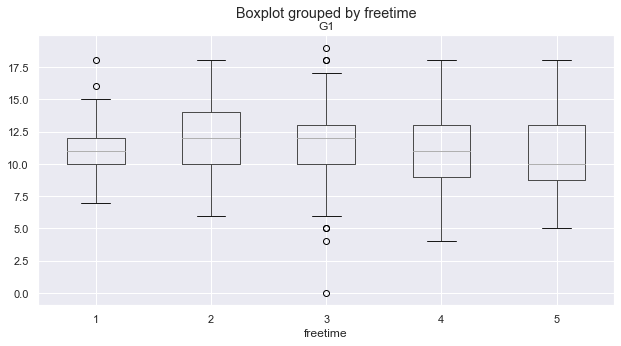

In [8]:
#boxplot of grade 1 per category of freetime
df_student_por.boxplot(column='G1', by='freetime');

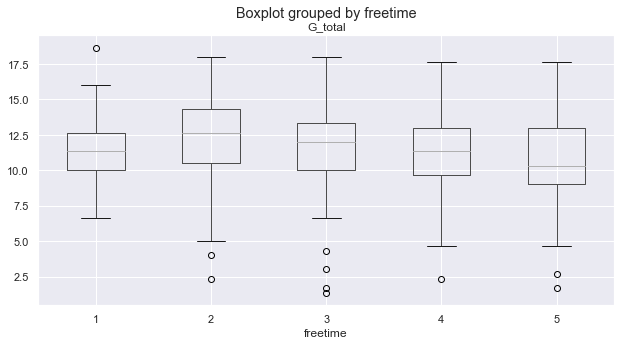

In [11]:
#Total grade for portuguese compared per category of freetime
df_student_por['G_total'] = (df_student_por['G1'] + df_student_por['G2'] + df_student_por['G3']) / 3
df_student_por.boxplot(column='G_total', by='freetime');

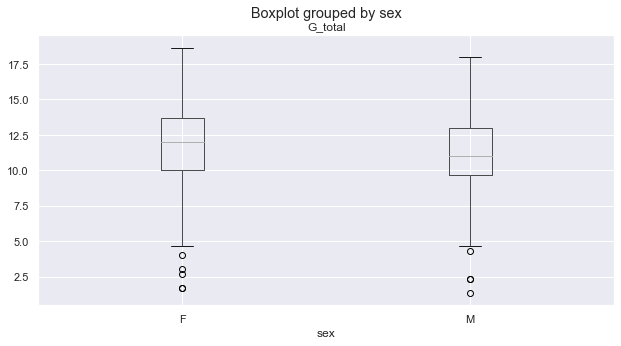

In [12]:
#Total grade for portuguese compared per sex
df_student_por.boxplot(column='G_total', by='sex');

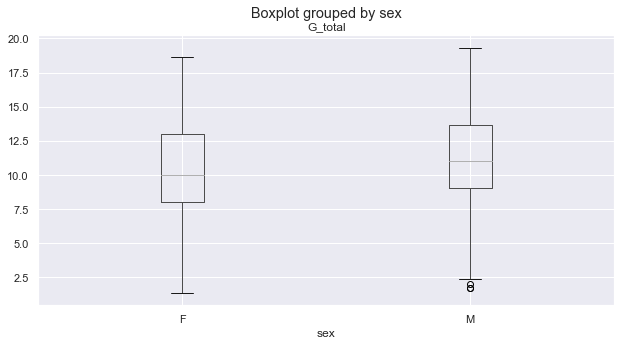

In [10]:
#total grade for maths per sex
df_student_mat['G_total'] = (df_student_mat['G1'] + df_student_mat['G2'] + df_student_mat['G3']) / 3
df_student_mat.boxplot(column='G_total', by='sex');

In [35]:
#preprocess data
mean_freetime_1 = sm.stats.DescrStatsW(df_freetime_1['G_total'])
mean_freetime_2 = sm.stats.DescrStatsW(df_freetime_2['G_total'])
mean_freetime_3 = sm.stats.DescrStatsW(df_freetime_3['G_total'])
mean_freetime_4 = sm.stats.DescrStatsW(df_freetime_4['G_total'])
mean_freetime_5 = sm.stats.DescrStatsW(df_freetime_5['G_total'])

#make test object
cm = sm.stats.CompareMeans(mean_freetime_2, mean_freetime_5)

#perform ttest, larger because we check if 2 is significantly larger than 5
ttest_freetime = cm.ttest_ind(alternative='larger')
ttest_freetime

#all ttest for mean of 2 being larger compared to the othres is significant.

(3.567908787475841, 0.00023285951537607624, 173.0)

In [39]:
#make column for total alcohol consumption and 2 dfs for male and female
df_student_por['total_alc'] = (df_student_por['Dalc'] + df_student_por['Walc']) / 2
df_female = df_student_por[df_student_por['sex'] == 'F'].copy()
df_male = df_student_por[df_student_por['sex'] == 'M'].copy()

#preprocess data
mean_female = sm.stats.DescrStatsW(df_female['total_alc'])
mean_male = sm.stats.DescrStatsW(df_male['total_alc'])

#make test object
cm = sm.stats.CompareMeans(mean_male, mean_female)

#perform ttest, again larger
ttest_alcohol = cm.ttest_ind(alternative='larger')
ttest_alcohol

(9.135399696622382, 4.1329923437750136e-19, 647.0)